explode function()

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ast

# import data
df = pd.read_csv("/goinfre/hrami/python_for_data/data_jobs.csv")

# data cleanup
df['job_posted_date'] = pd.to_datetime(df.job_posted_date)
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)



In [57]:
df_exploded = df.explode('job_skills')

In [58]:
skills_count = df_exploded.groupby(['job_title_short','job_skills']).size()
df_skills_count = skills_count.reset_index(name='skil_count')
df_skills_count = df_skills_count.sort_values(by='skil_count', ascending=False)

Text(0.5, 0, 'job posting count')

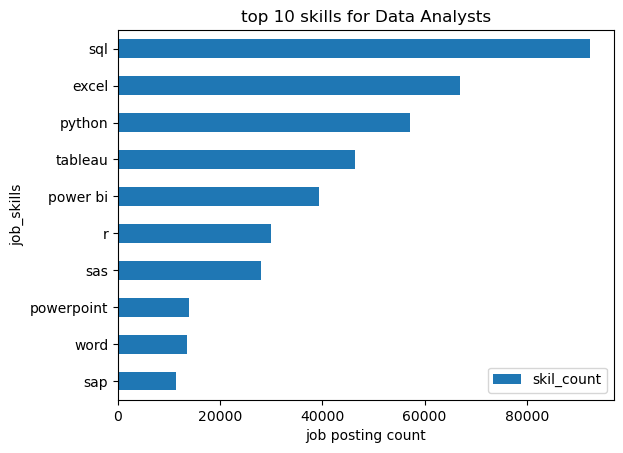

In [64]:
job = "Data Analyst"
top = 10

df_skills_final = df_skills_count[df_skills_count['job_title_short'] == job].head(top)
df_skills_final.plot(kind='barh', x='job_skills', y='skil_count')
plt.gca().invert_yaxis()
plt.title(f"top {top} skills for {job}s")
plt.xlabel("job posting count")